In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

Para Galleta con 75% de sustitución a 20 °C

In [ ]:
ruta="https://raw.githubusercontent.com/YolandaDonis/Temas-Selectos-IQ/refs/heads/main/Datos%20Proyecto%20Yolanda_Duviel_2.csv"

In [ ]:
df=pd.read_csv(ruta)
df

,Sal,aw,P_inicial,P_final,Xwi (g H2O/g galleta),We (g H2O/g SS)
0,LiCl,0.113,4.53,4.57,0.06,0.014
1,Na2SO4,0.265,3.73,3.92,0.06,0.057
2,CH3COOK,0.445,3.52,3.75,0.06,0.071
3,Mg(NO3)2,0.485,3.95,4.25,0.06,0.082
4,CuCl,0.685,3.73,4.18,0.06,0.127
5,K2CO3,0.682,3.95,4.52,0.06,0.151
6,NaCl,0.678,4.27,4.79,0.06,0.128
7,KCl,0.766,4.33,5.18,0.06,0.203


In [ ]:
df=df.set_index("Sal")
df

,aw,P_inicial,P_final,Xwi (g H2O/g galleta),We (g H2O/g SS)
Sal,,,,,
LiCl,0.113,4.53,4.57,0.06,0.014
Na2SO4,0.265,3.73,3.92,0.06,0.057
CH3COOK,0.445,3.52,3.75,0.06,0.071
Mg(NO3)2,0.485,3.95,4.25,0.06,0.082
CuCl,0.685,3.73,4.18,0.06,0.127
K2CO3,0.682,3.95,4.52,0.06,0.151
NaCl,0.678,4.27,4.79,0.06,0.128
KCl,0.766,4.33,5.18,0.06,0.203


In [ ]:
promedio_aw = df.filter(like='aw').values.mean() #promedio de la actividad de agua
print(promedio_aw)

0.514875


In [ ]:
promedio_We = df.filter(like='We (g H2O/g SS)').values.mean() #promedio de We
print(promedio_We)

0.104125


In [ ]:
desv_aw = df.filter(like='aw').values.std(ddof=1) #desviación estandar de la actividad de agua
print(desv_aw)

0.23184442905904445


In [ ]:
desv_We = df.filter(like='We (g H2O/g SS)').values.std(ddof=1) #desviación estandar de We
print(desv_We)

0.05975769526058668


In [ ]:
varianza_aw = df.filter(like='aw').values.var(ddof=1) #varianza de la actividad del agua
print(varianza_aw)

0.0537518392857143


In [ ]:
varianza_We = df.filter(like='We (g H2O/g SS)').values.var(ddof=1) #varianza de We
print(varianza_We)

0.003570982142857143


In [ ]:
aw = df.filter(like='aw') #rango de la actividad de agua

rango_aw = aw.values.max() - aw.values.min()
print(rango_aw)

0.653


In [ ]:
We = df.filter(like='We (g H2O/g SS)') #rango de We

rango_We = We.values.max() - We.values.min()
print(rango_We)

0.189


In [ ]:
cv_aw = (df['aw'].std(ddof=1) / df['aw'].mean()) * 100 #coeficiente de variacion de la actividad del agua
print(cv_aw)

45.029265172914684


In [ ]:
cv_We = (df['We (g H2O/g SS)'].std(ddof=1) / df['We (g H2O/g SS)'].mean()) * 100 #coeficiente de variacion de We
print(cv_We)

57.390343587598245


**Construcción de las isotermas**

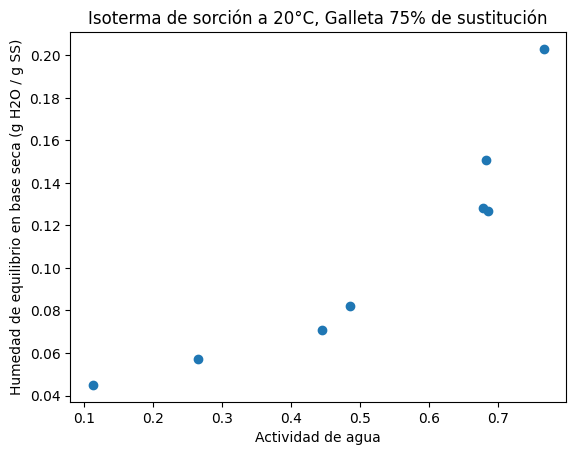

In [ ]:
plt.figure()
plt.scatter(df['aw'],df["We (g H2O/g SS)"])
plt.xlabel('Actividad de agua')
plt.ylabel('Humedad de equilibrio en base seca (g H2O / g SS)')
plt.title('Isoterma de sorción a 20°C, Galleta 75% de sustitución')
plt.show()

Modelo de BET

In [ ]:
df['aw/[(1-aw)*We]'] = (df['aw'] /
    ((1 - df['aw']) * df['We (g H2O/g SS)']))

tabla_modelo_BET = df[[
    'aw',
    'We (g H2O/g SS)',
    'aw/[(1-aw)*We]']]
tabla_modelo_BET

,aw,We (g H2O/g SS),aw/[(1-aw)*We]
Sal,,,
LiCl,0.113,0.014,9.099694
Na2SO4,0.265,0.057,6.325337
CH3COOK,0.445,0.071,11.292983
Mg(NO3)2,0.485,0.082,11.484726
CuCl,0.685,0.127,17.122860
K2CO3,0.682,0.151,14.203007
NaCl,0.678,0.128,16.449922
KCl,0.766,0.203,16.125637


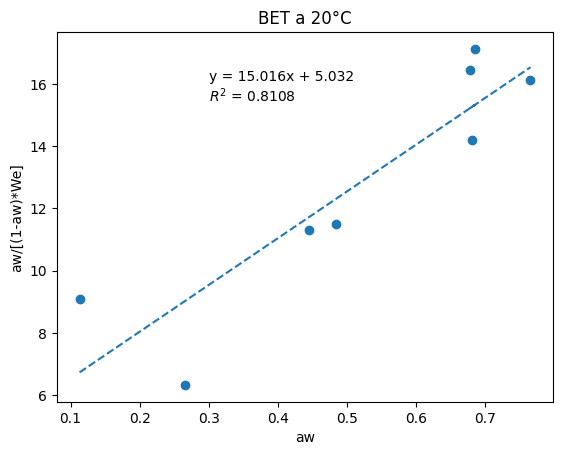

In [ ]:
#tabla con eL ajuste lineal

x = tabla_modelo_BET['aw'].values
y = tabla_modelo_BET['aw/[(1-aw)*We]'].values

m, b = np.polyfit(x, y, 1)
y_fit = m * x + b

#Coeficiente de determinación R²
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean)**2)
ss_res = np.sum((y - y_fit)**2)

R2 = 1 - (ss_res / ss_tot)

plt.figure()
plt.scatter(x, y)
plt.plot(x, y_fit, linestyle='--')
plt.xlabel('aw')
plt.ylabel('aw/[(1-aw)*We]')
plt.title('BET a 20°C')

# Texto con ecuación y R²
plt.text(0.30,
    max(y)*0.9,
    f'y = {m:.3f}x + {b:.3f}\n$R^2$ = {R2:.4f}',
    fontsize=10)
plt.show()

In [ ]:
#calculando los parámetros de BET

C = 1 + (m / b)
W0 = 1 / (C*b)


print(f"W0 (monocapa) = {W0:.4f} g H2O / g SS")
print(f"C (constante BET) = {C:.2f}")


W0 (monocapa) = 0.0499 g H2O / g SS
C (constante BET) = 3.98


In [ ]:
parametros_BET = pd.DataFrame({
    'Parámetro': ['W0', 'C'],
    'Valor': [W0, C]})
parametros_BET


,Parámetro,Valor
0,W0,0.049881
1,C,3.984302


In [ ]:
df['We_BET'] = (W0*C*df['aw'] )/((1 - df['aw']) * (1+(C*df['aw'])-df['aw']))

tabla_We_BET = df[[
    'aw',
    'We_BET']]
tabla_We_BET

,aw,We_BET
Sal,,
LiCl,0.113,0.018934
Na2SO4,0.265,0.040012
CH3COOK,0.445,0.068449
Mg(NO3)2,0.485,0.076475
CuCl,0.685,0.141967
K2CO3,0.682,0.140425
NaCl,0.678,0.138412
KCl,0.766,0.197987


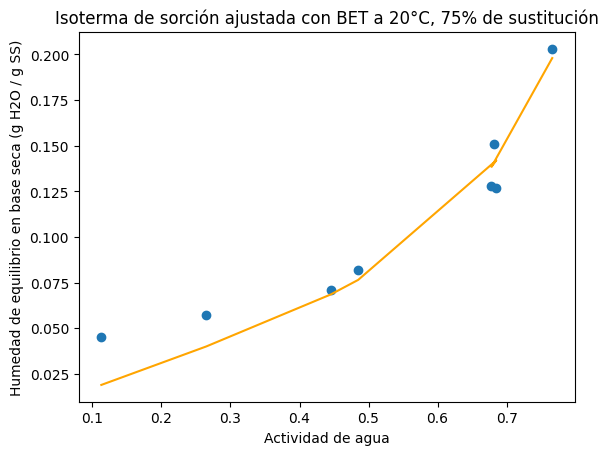

In [ ]:
#comprobando el ajuste del modelo de BET respecto a los datos experimentales

plt.figure()
plt.scatter(df['aw'],df["We (g H2O/g SS)"])
plt.plot(tabla_We_BET['aw'],tabla_We_BET["We_BET"], color="orange")
plt.xlabel('Actividad de agua')
plt.ylabel('Humedad de equilibrio en base seca (g H2O / g SS)')
plt.title('Isoterma de sorción ajustada con BET a 20°C, 75% de sustitución')
plt.show()

**Modelo de GAB**

In [ ]:
df.loc['LiCl', 'We (g H2O/g SS)'] = 0.045

df['aw/We'] = (df['aw']) / (df["We (g H2O/g SS)"])

tabla_modelo_GAB = df[[
    'aw',
    'We (g H2O/g SS)',
    'aw/We']]
tabla_modelo_GAB

,aw,We (g H2O/g SS),aw/We
Sal,,,
LiCl,0.113,0.045,2.511111
Na2SO4,0.265,0.057,4.649123
CH3COOK,0.445,0.071,6.267606
Mg(NO3)2,0.485,0.082,5.914634
CuCl,0.685,0.127,5.393701
K2CO3,0.682,0.151,4.516556
NaCl,0.678,0.128,5.296875
KCl,0.766,0.203,3.773399


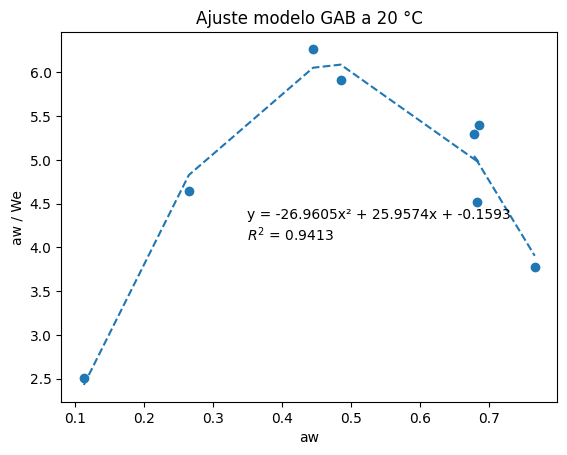

In [ ]:
#ajuste cuadrático del modelo de GAB

x = tabla_modelo_GAB['aw'].values
y = tabla_modelo_GAB['aw/We'].values

a, b, c = np.polyfit(x, y, 2)
y_GAB = a*x**2 + b*x + c

y_mean = np.mean(y)
ss_res = np.sum((y - y_GAB)**2)
ss_tot = np.sum((y - y_mean)**2)
R2 = 1 - ss_res/ss_tot
plt.figure()

plt.scatter(x, y)
plt.plot(x, y_GAB, linestyle='--')
plt.xlabel('aw')
plt.ylabel('aw / We')
plt.title('Ajuste modelo GAB a 20 °C')
plt.text(0.35,
    max(y)*0.65,
    f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}\n$R^2$ = {R2:.4f}',
    fontsize=10)
plt.show()

In [ ]:
from scipy.optimize import curve_fit

def GAB(aw, W0, C, K):
    return (W0 * C * K * aw) / (
        (1 - K * aw) * (1 - K * aw + C * K * aw))

aw_exp = df['aw'].values
We_exp = df['We (g H2O/g SS)'].values

p0 = [0.05, 10, 0.8]   # W0, C, K

params, cov = curve_fit(
    GAB,
    aw_exp,
    We_exp,
    p0=p0,
    maxfev=10000)

W0, C, K = params
print(f"W0 = {W0:.5f} g H2O/g SS")
print(f"C  = {C:.2f}")
print(f"K  = {K:.3f}")

W0 = 0.03855 g H2O/g SS
C  = 61089367.63
K  = 1.055


In [ ]:
df['We_GAB'] = (W0*C*K*df['aw'] )/((1 - (K*df['aw'])) * (1+(C*K*df['aw'])-(K*df['aw'])))

tabla_We_GAB = df[[
    'aw',
    'We_GAB']]
tabla_We_GAB

,aw,We_GAB
Sal,,
LiCl,0.113,0.043771
Na2SO4,0.265,0.053513
CH3COOK,0.445,0.072664
Mg(NO3)2,0.485,0.078941
CuCl,0.685,0.138977
K2CO3,0.682,0.137410
NaCl,0.678,0.135374
KCl,0.766,0.200837


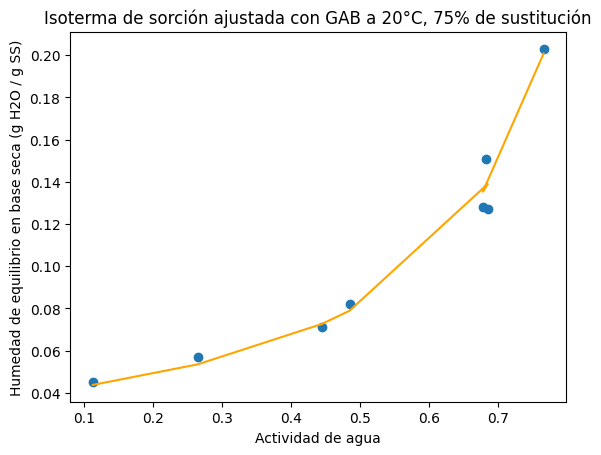

In [ ]:
#comprobando el ajuste del modelo de GAB respecto a los datos experimentales

plt.figure()
plt.scatter(df['aw'],df["We (g H2O/g SS)"])
plt.plot(tabla_We_GAB['aw'],tabla_We_GAB["We_GAB"], color="orange")
plt.xlabel('Actividad de agua')
plt.ylabel('Humedad de equilibrio en base seca (g H2O / g SS)')
plt.title('Isoterma de sorción ajustada con GAB a 20°C, 75% de sustitución')
plt.show()